In [1]:
# Based on 
#  - https://github.com/biplav-s/course-d2d-ai/blob/main/sample-code/l6-l7-l8-supervised-ml/Supervised-Regression.ipynb
#  - https://github.com/biplav-s/course-d2d-ai/blob/main/sample-code/l6-l7-l8-supervised-ml/Supervised-Regression-Classification.ipynb
#  - https://realpython.com/linear-regression-in-python/
#  - https://stackabuse.com/linear-regression-in-python-with-scikit-learn/

In [2]:
import pandas as pd
import numpy as np

# Regression problem

In [3]:
# Local data cache
agg_file = '../common-data/covid/latest_sc_r.csv'

In [4]:
# Read data from local file
data = pd.read_csv(agg_file, parse_dates=['date'])
data.head()

,date,county,state,fips,cases,deaths
0,2020-03-17,Richland,South Carolina,45079.0,1,0.0
1,2020-03-18,Richland,South Carolina,45079.0,4,0.0
2,2020-03-19,Richland,South Carolina,45079.0,8,0.0
3,2020-03-20,Richland,South Carolina,45079.0,22,0.0
4,2020-03-21,Richland,South Carolina,45079.0,28,0.0


In [5]:
# Seeing visually if there is a relationship between cases and deaths
import matplotlib.pyplot as plt
%matplotlib inline

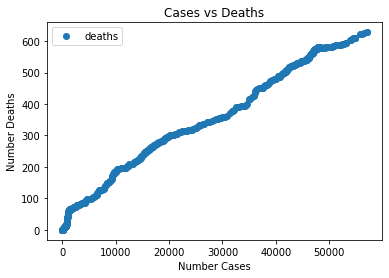

In [6]:
data.plot(x='cases', y='deaths', style='o')
plt.title('Cases vs Deaths')
plt.xlabel('Number Cases')
plt.ylabel('Number Deaths')
plt.show()

In [7]:
# Imports for classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LinearRegression

In [8]:
# Get the data of interest
x = data ['cases']
y = data ['deaths']

In [9]:
# Type and shape changes
x, y = np.array(x), np.array(y)

In [10]:
x = x.reshape(-1,1)

In [11]:
# Get a subset for taining and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [12]:
print (x_train.size, x_test.size, y_train.size, y_test.size)

424 106 424 106


In [13]:
# Train a linear regression mode
model = LinearRegression().fit(x_train, y_train)

In [14]:
# Model information
print (' Model details:')
print (' -  intercept : ', model.intercept_)
print (' -  coeff : ', model.coef_)

 Model details:
 -  intercept :  48.52907904522999
 -  coeff :  [0.01091936]


In [15]:
# Predicted values for train and test
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [16]:
# Define a function to predict error statistics
def print_stats(y_actual, y_pred):
    print('Mean Absolute Error:', metrics.mean_absolute_error(y_actual, y_pred))
    print('Mean Squared Error:', metrics.mean_squared_error(y_actual, y_pred))
    print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_actual, y_pred)))

In [17]:
# Print for training data
print_stats(y_train, y_pred_train)

Mean Absolute Error: 15.205146435029755
Mean Squared Error: 439.23617548064834
Root Mean Squared Error: 20.95796210228104


In [18]:
import matplotlib.pyplot as plt

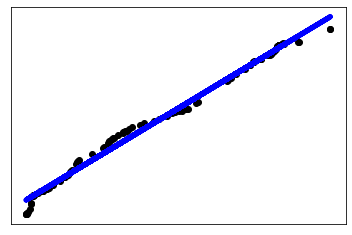

In [19]:
# Visually showing the results
plt.scatter(x_test, y_test, color='black')
plt.plot(x_test, y_pred_test, color='blue', linewidth=5)
plt.xticks(())
plt.yticks(())
plt.show()

# Classification Problem

In [20]:
# We will load state data and make a classification problem
data_file = '../common-data/covid/latest_sc.csv'

In [21]:
# Read data from local file
data = pd.read_csv(data_file, parse_dates=['date'])
data.head()

,date,county,state,fips,cases,deaths
0,2020-03-06,Charleston,South Carolina,45019.0,1,0.0
1,2020-03-06,Kershaw,South Carolina,45055.0,1,0.0
2,2020-03-07,Charleston,South Carolina,45019.0,1,0.0
3,2020-03-07,Kershaw,South Carolina,45055.0,1,0.0
4,2020-03-08,Charleston,South Carolina,45019.0,1,0.0


In [22]:
# We will create a column to signify whether data is for Richland county or not
data['richland?'] = data.apply(lambda x: ('Y' if (x['county'] == 'Richland') else 'N'), axis=1 )

In [23]:
data.head()

,date,county,state,fips,cases,deaths,richland?
0,2020-03-06,Charleston,South Carolina,45019.0,1,0.0,N
1,2020-03-06,Kershaw,South Carolina,45055.0,1,0.0,N
2,2020-03-07,Charleston,South Carolina,45019.0,1,0.0,N
3,2020-03-07,Kershaw,South Carolina,45055.0,1,0.0,N
4,2020-03-08,Charleston,South Carolina,45019.0,1,0.0,N


In [24]:
# Imports for classification
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.linear_model import LogisticRegression

In [25]:
# Get the data of interest. Predict whether the case is for Richland
x = data ['cases']
y = data ['richland?']

In [26]:
# How balanced is the data?
data['richland?'].value_counts()

N    23693
Y      530
Name: richland?, dtype: int64

In [27]:
# Type and shape changes
x, y = np.array(x), np.array(y)

In [28]:
x = x.reshape(-1,1)

In [30]:
# Get a subset for taining and testing
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)

In [31]:
print (x_train.size, x_test.size, y_train.size, y_test.size)

19378 4845 19378 4845


In [32]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24223 entries, 0 to 24222
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   date       24223 non-null  datetime64[ns]
 1   county     24223 non-null  object        
 2   state      24223 non-null  object        
 3   fips       24220 non-null  float64       
 4   cases      24223 non-null  int64         
 5   deaths     24223 non-null  float64       
 6   richland?  24223 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 1.3+ MB


In [33]:
# Train a linear regression mode
logreg = LogisticRegression(C=1e5)
model = logreg.fit(x_train, y_train)

In [34]:
# Model information
print (' Model details:')
print (' -  intercept : ', model.intercept_)
print (' -  coeff : ', model.coef_)

 Model details:
 -  intercept :  [-4.54459956]
 -  coeff :  [[5.67705511e-05]]


In [35]:
# Predicted values for train and test
y_pred_train = model.predict(x_train)
y_pred_test = model.predict(x_test)

In [36]:
# Confusion matrix
from sklearn.metrics import confusion_matrix

In [37]:
CM = confusion_matrix(y_test, y_pred_test)
print (CM)

[[4729    4]
 [ 112    0]]
